In [1]:
# imports
import os

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
# load model
from modern import Net
model_dir = 'out/modern'
model = Net()
model.load_state_dict(torch.load(os.path.join(model_dir, 'model.pt')), strict=False)
model.eval();

In [124]:
# load data
Xtr, Ytr = torch.load('emnist_train1989.pt')
Xte, Yte = torch.load('emnist_test1989.pt')

In [125]:
for ix in range(10):
    x, y = Xtr[[ix]], Ytr[[ix]]
    yhat = model(x)
    print(yhat.shape)

torch.Size([1, 62])
torch.Size([1, 62])
torch.Size([1, 62])
torch.Size([1, 62])
torch.Size([1, 62])
torch.Size([1, 62])
torch.Size([1, 62])
torch.Size([1, 62])
torch.Size([1, 62])
torch.Size([1, 62])


In [126]:

def grid_mistakes(X, Y):
    
    plt.figure(figsize=(14, 4))
    ishow, nshow = 0, 14
    emnist_labels = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
    20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T',
    30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z',
    36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j',
    46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't',
    56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z'
}
    for ix in range(X.size(0)):
        x, y = X[[ix]], Y[[ix]]
        yhat = model(x)
        yi = y.argmax()
        yhati = yhat.argmax()
        if yi != yhati:
            plt.subplot(2, 7, ishow+1)
            plt.imshow(x[0,0], cmap='gray')
            plt.title(f'gt={emnist_labels[int(yi)]}, pred={emnist_labels[int(yhati)]}')
            plt.axis('off')
            ishow += 1
            if ishow >= nshow:
                break


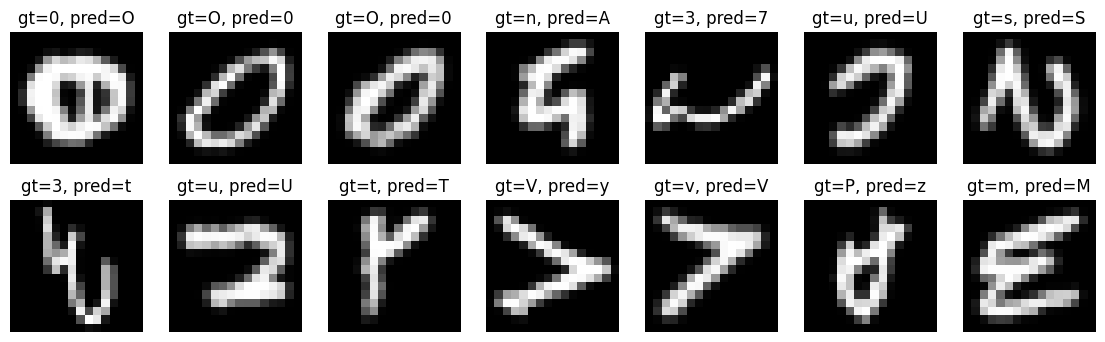

In [127]:
grid_mistakes(Xtr, Ytr) # training set mistakes

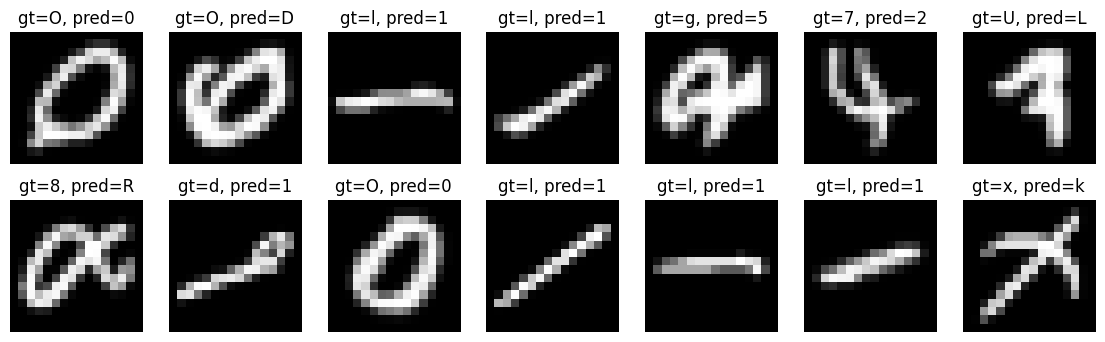

In [128]:
grid_mistakes(Xte, Yte) # test set mistakes

In [106]:
!python prepro.py

In [122]:
!python modern.py

{'learning_rate': 0.0003, 'output_dir': 'out/modern'}
model stats:
# params:       45176
# MACs:         512580
# activations:  2396
1
eval: split train. loss 5.326719e+00. error 62.76%. misses: 4575
eval: split test . loss 5.326719e+00. error 63.18%. misses: 1267
2
eval: split train. loss 4.090777e+00. error 43.16%. misses: 3147
eval: split test . loss 4.090777e+00. error 42.00%. misses: 843
3
eval: split train. loss 2.661982e+00. error 36.72%. misses: 2677
eval: split test . loss 2.661982e+00. error 35.87%. misses: 719
4
eval: split train. loss 3.822156e+00. error 31.86%. misses: 2322
eval: split test . loss 3.822156e+00. error 32.04%. misses: 642
5
eval: split train. loss 2.938175e+00. error 29.30%. misses: 2135
eval: split test . loss 2.938175e+00. error 29.90%. misses: 599
6
eval: split train. loss 2.662993e-01. error 27.02%. misses: 1970
eval: split test . loss 2.662993e-01. error 27.90%. misses: 559
7
eval: split train. loss 1.948544e+00. error 25.33%. misses: 1847
eval: split t